# Gradiente Descendente Estocástico

Iremos usar o dataset de previsão de preços de casas disponível no kaggle ([House Prices: Advanced Regression Tecniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/)).

Sugiro fortemente como leitura complementar explorar os notebooks dessa competição e aprender com os competidores e quem sabe até participar da competição!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregando os dados

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/datasets/house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
# selecionando o target
target = 'SalePrice'

# construindo uma lista com os nomes apenas das variáveis categóricas
cat_vars = df.select_dtypes(include='object').columns.to_list()

# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df.columns if col not in cat_vars + ['Id', target]]

# separando a base em treino e teste
# nesse momento iremos utilizar somente as variáveis numéricas
X = df.filter(num_vars).copy()
y = df['SalePrice'].copy()

X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [5]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

## Aplicando SGDRegressor

In [7]:
# instalando o pacote feature-engine
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 2.5 MB/s eta 0:00:00


In [8]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import MeanMedianImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

model = Pipeline(steps=[
    ('numeric_imputer', MeanMedianImputer(imputation_method="median", variables=num_vars)),
    ('std_scaler',  SklearnTransformerWrapper(transformer = StandardScaler(), variables = num_vars)),
    ('sgd', SGDRegressor(random_state=42))
])

In [9]:
model.fit(X_train, y_train)
y_previsto = model.predict(X_test)
y_esperado = y_test.copy()

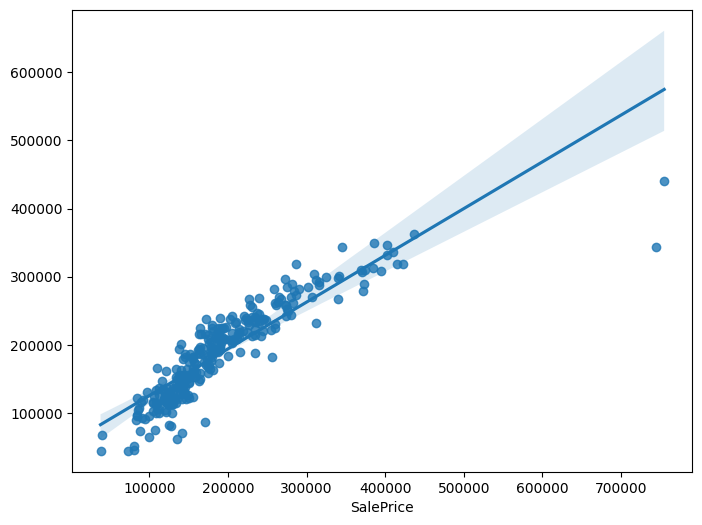

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x=y_esperado, y=y_previsto, ax=ax);

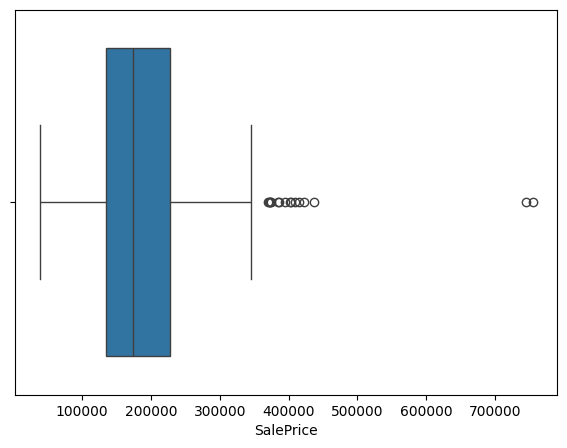

In [11]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_esperado);

### Computando as métricas para o modelo ajustado.

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_log_error


def adjusted_r2(y_esperado, y_previsto, X_treino):
  R2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - R2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

r2_ajustado = adjusted_r2(y_esperado, y_previsto, X_train)
print('R2 Ajustado:', r2_ajustado)
print()
mae = mean_absolute_error(y_esperado, y_previsto)
print('MAE:', mae)

mse = mean_squared_error(y_esperado, y_previsto)
print('MSE:', mse)

rmse = mean_squared_error(y_esperado, y_previsto, squared=False)
print('RMSE:', rmse)

rmsle = mean_squared_log_error(y_esperado, y_previsto, squared=False)
print('RMSLE:', rmsle)
print()
m_error = max_error(y_esperado, y_previsto)
print('Max Error:', m_error)

mape = mean_absolute_percentage_error(y_esperado, y_previsto)
print('MAPE:', mape)


R2 Ajustado: 0.7446690373896598

MAE: 23734.006994820014
MSE: 1739138524.4569535
RMSE: 41702.97980309025
RMSLE: 0.17740766928763962

Max Error: 400868.899233824
MAPE: 0.12385534023300664


Olhando para a métrica MAPE erramos em média 12%.